## Projeto MOKA - Sindrome Rara MPSII





Foram selecionados os atributos para compor essa análise , a partir da amostra dos atendimentos via hospital. Os detalhes dessa análise e seleção , estão no documento "Feature Analysis - Hospital.xlsx" ( https://github.com/paulo-moreti/MOKA ). 

Aqui iniciamos a fase de preparação dos dados e seguimos com a exploração de seu potencial para utilização em projeto de Machine Learning. Ao final , apresentamos nossas conclusões.



In [199]:
# Carga das bibliotecas 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from scipy import stats
import researchpy as rp
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [200]:
# Carga dos dados originais - Base Hospital
df = pd.read_excel (r'''/home/paulo/Work-Main/Projeto MOKA/Arquivos MPS-II/Machine_Learning_MPS_RD_2.xlsx''' )

In [146]:
# Dimensões da tabela de dados ( linhas , colunas )
print(df.shape)

(11442, 115)


In [147]:
# Uma amostra dos dados carregados
df.head()

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,PCN (CEP+NASC+SEXO),IDENT,CEP,MUNIC_RES,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
0,110004,2012,4,7,NaN,1112100490853,76974000200711161,1,76974000,110009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,110004,2013,12,3,NaN,1113100408629,76960970199712051,1,76960970,110004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,110015,2015,11,7,4.380507e+12,1115100750820,76920000200206211,1,76920000,110015,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,110000,2015,12,7,4.287520e+12,1115101117526,76960970199712051,1,76960970,110004,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,110009,2016,4,7,4.695284e+12,1116100542205,76974000200711161,1,76974000,110009,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data Wrangling
"It's the process of converting data from the initial format to a format that may be better for analysis"

In [201]:
# Remove all of the columns we don’t consider for this analysis after initial lookup 
df = df[['MUNIC_RES', 'UTI_MES_TO', 'UTI_INT_TO', 'PROC_REA', 'VAL_SH', 'VAL_UTI', 
         'DIAG_PRINC', 'DIAG_SECUN', 'IDADE', 'DIAS_PERM' , 'DIAGSEC1', 'DIAGSEC2', 'DIAGSEC3' ]]

In [202]:
# Columns listing / Atributes Data Types 
df.dtypes

MUNIC_RES       int64
UTI_MES_TO      int64
UTI_INT_TO      int64
PROC_REA        int64
VAL_SH        float64
VAL_UTI       float64
DIAG_PRINC     object
DIAG_SECUN     object
IDADE           int64
DIAS_PERM       int64
DIAGSEC1       object
DIAGSEC2       object
DIAGSEC3       object
dtype: object

In [150]:
# Verificando valores zerados

#count rows with value = 0 
len(df[df['DIAG_SECUN'] == 0 ])

7211

Rows zero value : 

MUNIC_RES  = 0  
UTI_MES_TO =  11412
UTI_INT_TO =  11442
PROC_REA   = 0        
VAL_SH     = 0
VAL_UTI    = 11412 
DIAG_PRINC = 0
DIAG_SECUN = 0    
IDADE      = 3  
DIAS_PERM  = 9302 
DIAGSEC1   = 0
DIAGSEC2   = 0
DIAGSEC3   = 0

Dado que praticamente a totalidade  dos valores dos atributos  :  UTI_MES_TO , UTI_INT_TO , VAL_UTI estão zerados
serão desconsiderados na análise. 
As linhas correspondentes aos valores zerados do atributo DIAS_PERM serão apagadas.

In [204]:
# drop columns 
df=  df.drop(['UTI_MES_TO'], axis=1)
df=  df.drop(['UTI_INT_TO'], axis=1)
df=  df.drop(['VAL_UTI'], axis=1)
# drop rows with zero values in atribute
df.drop(df[df.DIAS_PERM == 0].index, inplace=True)

### Data Missing
How to deal with missing data:

1. Drop data :
  drop the whole row or drop the whole column
2. Replace data : 
    a. replace it by mean
    b. replace it by frequency
    c. replace it based on other functions

Whole columns should be dropped only if most entries in the column are empty. 

In [207]:
# code from : https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe/39734251#39734251
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
missing_values_table(df)

Your selected dataframe has 6 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


Baseado nos critérios de tratamento dos dados "missing"  iremos desprezar as features com a maioria de valores nulos ( DIAGSEC1 , 2, 3 ) 
e eliminar linhas com valores nulos ( Diagnostico Sec. ) .Mas a coluna 'Diagnostico Sec." mesmo retirando as ocorrencias nulas , tem muitos zeros. Iremos eliminar essa coluna também. 

In [206]:
df=  df.drop(['DIAGSEC3'], axis=1)
df = df.drop(['DIAGSEC2'], axis=1)
df = df.drop(['DIAGSEC1'], axis=1)
#df= df.drop(df.loc[df['DIAG_SECUN'].isnull()].index)
df = df.drop(['DIAG_SECUN'], axis=1)

### Data Transformation

Method to transform feature code in numerical value : 
LabelCount encoding and it revolves around ranking categories by their counts in the train set. Because it ranks the values, either ascending or descending order can be used. LabelCount has certain advantages in comparison to standard count encoding - it is not sensitive to outliers and should not give the same encoding to different values.
Source : https://wrosinski.github.io/fe_categorical_encoding/

In [154]:
# Converting data types ( categorical feature in numerical values )
df.DIAG_PRINC.value_counts()[:10]

E762    676
E761    555
E763    319
E760    134
E752     91
E889     54
G328     51
J189     21
Z039     17
E730     14
Name: DIAG_PRINC, dtype: int64

In [ ]:
def labelcount_encode(X, categorical_features, ascending=False):
    print('LabelCount encoding: {}'.format(categorical_features))
    X_ = pd.DataFrame()
    for cat_feature in categorical_features:
        cat_feature_value_counts = X[cat_feature].value_counts()
        value_counts_list = cat_feature_value_counts.index.tolist()
        if ascending:
            # for ascending ordering
            value_counts_range = list(
                reversed(range(len(cat_feature_value_counts))))
        else:
            # for descending ordering
            value_counts_range = list(range(len(cat_feature_value_counts)))
        labelcount_dict = dict(zip(value_counts_list, value_counts_range))
        X_[cat_feature] = X[cat_feature].map(
            labelcount_dict)
    X_ = X_.add_suffix('_labelcount_encoded')
    if ascending:
        X_ = X_.add_suffix('_ascending')
    else:
        X_ = X_.add_suffix('_descending')
    X_ = X_.astype(np.uint32)
    return X_


In [162]:
df.DIAG_PRINC = labelcount_encode(df, ['DIAG_PRINC'])


LabelCount encoding: ['DIAG_PRINC']


In [208]:
## scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder
## LINK : https://machinelearningmastery.com/data-preparation-gradient-boosting-xgboost-python/
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.DIAG_PRINC)

list(le.classes_)



['A049',
 'A084',
 'A09',
 'A418',
 'A419',
 'A491',
 'A499',
 'B012',
 'B170',
 'B259',
 'B460',
 'C414',
 'C930',
 'D162',
 'D759',
 'E108',
 'E358',
 'E42',
 'E45',
 'E46',
 'E700',
 'E708',
 'E711',
 'E713',
 'E730',
 'E750',
 'E752',
 'E760',
 'E761',
 'E762',
 'E763',
 'E769',
 'E784',
 'E790',
 'E840',
 'E848',
 'E86',
 'E889',
 'F229',
 'F510',
 'G318',
 'G328',
 'G400',
 'G407',
 'G408',
 'G409',
 'G473',
 'G478',
 'G560',
 'G800',
 'G801',
 'G823',
 'G912',
 'G919',
 'G958',
 'G960',
 'H46',
 'I012',
 'I088',
 'I878',
 'J039',
 'J040',
 'J068',
 'J069',
 'J128',
 'J152',
 'J158',
 'J159',
 'J180',
 'J188',
 'J189',
 'J209',
 'J219',
 'J350',
 'J352',
 'J353',
 'J40',
 'J438',
 'J448',
 'J459',
 'J46',
 'J679',
 'J840',
 'J960',
 'J961',
 'K092',
 'K210',
 'K319',
 'K359',
 'K400',
 'K402',
 'K409',
 'K429',
 'K449',
 'K460',
 'K591',
 'K639',
 'K669',
 'K763',
 'K938',
 'L022',
 'L031',
 'L089',
 'M548',
 'M848',
 'N390',
 'N47',
 'O141',
 'O429',
 'O479',
 'P073',
 'P228',
 

In [160]:
le.transform(df.DIAG_PRINC)



array([34,  1,  1, ..., 10,  1,  1])

In [161]:
list(le.inverse_transform([60, 65, 28]))

[60, 65, 28]

In [ ]:
# After data conversion 
df.head()

### Removing Outliers

These can be due to typos in data entry, mistakes in units, or they could be legitimate but extreme values.

In [163]:
# Before remove Outliers ( # observations, # columns/features)
print(df.shape)

(1926, 6)


In [164]:
df=df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [165]:
# See the column data types and non-missing values *** After cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670 entries, 3 to 11438
Data columns (total 6 columns):
MUNIC_RES     1670 non-null int64
PROC_REA      1670 non-null int64
VAL_SH        1670 non-null float64
DIAG_PRINC    1670 non-null uint32
IDADE         1670 non-null int64
DIAS_PERM     1670 non-null int64
dtypes: float64(1), int64(4), uint32(1)
memory usage: 84.8 KB


In [166]:
# After 
print(df.shape)

(1670, 6)


### ===> 1 .925 observations (atendimentos ) with 5 columns (features) more 1 target ( DIAG_PRINC )

# Exploratory data analysis (EDA)

It´s an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data

### Plotting Feature Distribution

In [167]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)



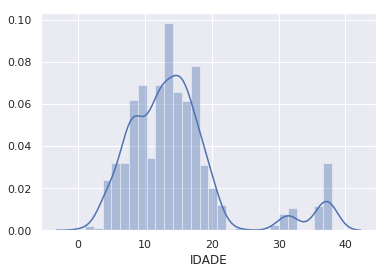

In [168]:
# Plotting univariate distributions
sns.distplot(df.IDADE);

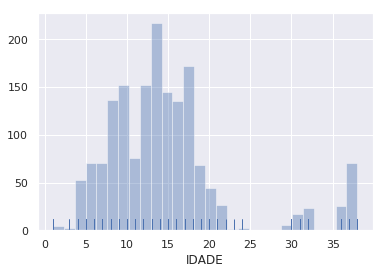

In [169]:
# Histograms
sns.distplot(df.IDADE, kde=False, rug=True);

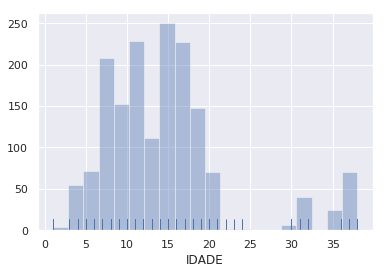

In [170]:
# with BINS 
sns.distplot(df.IDADE, bins=20, kde=False, rug=True);

### Data Normalization

Why normalization?
Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variable variance is 1, or scaling the variable so the variable values range from 0 to 1.

Feature Scaling
https://towardsdatascience.com/a-complete-machine-learning-project-walk-through-in-python-part-two-300f1f8147e2 (**)

Scaling refers to the general process of changing the range of a feature. This is necessary because features are measured in different units, and therefore cover different ranges. Methods such as support vector machines and K-nearest neighbors that take into account distance measures between observations are significantly affected by the range of the features and scaling allows them to learn. 
--> While methods such as Linear Regression and Random Forest do not actually require feature scaling, it is still best practice to take this step when we are comparing multiple algorithms.

In [171]:
# replace (origianl value) by (original value)/(maximum value)
df['VAL_SH'] = df['VAL_SH']/df['VAL_SH'].max()
df['PROC_REA '] = df['PROC_REA']/df['PROC_REA'].max()
df['MUNIC_RES'] = df['MUNIC_RES']/df['MUNIC_RES'].max()
df['DIAG_PRINC'] = df['DIAG_PRINC']/df['DIAG_PRINC'].max()
df['IDADE'] = df['IDADE']/df['IDADE'].max()
df['DIAS_PERM'] = df['DIAS_PERM']/df['DIAS_PERM'].max()

In [194]:
## (**) MAYBE THE BEST METHOD TO NORMALIZE 
from sklearn.preprocessing import MinMaxScaler
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
# Fit on the training data
scaler.fit(X)
# Transform both the training and testing data
X = scaler.transform(X)


In [172]:
# Statistics for each column
df.describe()

,MUNIC_RES,PROC_REA,VAL_SH,DIAG_PRINC,IDADE,DIAS_PERM,PROC_REA
count,1670.000000,1.670000e+03,1670.000000,1670.000000,1670.000000,1670.000000,1670.000000
mean,0.464408,3.030311e+08,0.206298,0.086427,0.383691,0.259581,0.999640
std,0.156268,9.065131e+03,0.071179,0.119050,0.199682,0.072805,0.000030
min,0.255591,3.030300e+08,0.180201,0.000000,0.026316,0.250000,0.999637
25%,0.302656,3.030300e+08,0.192638,0.000000,0.236842,0.250000,0.999637
50%,0.581612,3.030300e+08,0.192638,0.066667,0.368421,0.250000,0.999637
75%,0.607635,3.030300e+08,0.192638,0.133333,0.447368,0.250000,0.999637
max,1.000000,3.031402e+08,1.000000,1.000000,1.000000,1.000000,1.000000


### Pearson , Spearman , Kendall Correlation

https://www.datascience.com/blog/introduction-to-correlation-learn-data-science-tutorials

http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/

The Pearson Correlation measures the linear dependence between two variables, X and Y. The resulting coefficient is a value between -1 and 1 inclusive, where:

     1 : total positive linear correlation,
     0 : no linear correlation, the two variables most likely do not affect each other
    -1 : total negative linear correlation.
    
Positive Correlation: both variables change in the same direction.
Neutral Correlation: No relationship in the change of the variables.
Negative Correlation: variables change in opposite directions



In [ ]:
df.corr()

#### Idade x Diagnóstico Principal

In [173]:
df[["IDADE","DIAG_PRINC"]].corr()

,IDADE,DIAG_PRINC
IDADE,1.000000,-0.300251
DIAG_PRINC,-0.300251,1.000000


In [174]:
df[["IDADE","DIAG_PRINC"]].corr(method='kendall')

,IDADE,DIAG_PRINC
IDADE,1.000000,-0.332224
DIAG_PRINC,-0.332224,1.000000


In [41]:
df[["IDADE","DIAG_PRINC"]].corr(method='pearson')

,IDADE,DIAG_PRINC
IDADE,1.000000,-0.072244
DIAG_PRINC,-0.072244,1.000000


In [175]:
 df[["IDADE","DIAG_PRINC"]].corr(method='spearman')

,IDADE,DIAG_PRINC
IDADE,1.000000,-0.418517
DIAG_PRINC,-0.418517,1.000000


### ANOVA 

https://www.statisticssolutions.com/anova-analysis-of-variance/

The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells us the statistical significance of our calculated score value.

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.



In [100]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [176]:

# Create features and target
X=df.drop('DIAG_PRINC',axis=1)
y=df['DIAG_PRINC']

In [101]:
# Create an SelectKBest object to select features with two best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=2)

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(X, y)

In [102]:
# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 5
Reduced number of features: 2


In [103]:
X_kbest.shape

(2140, 2)

In [111]:
X_kbest

array([[  3.03080078e+08,   2.75660000e+02],
       [  3.03140151e+08,   5.54750000e+02],
       [  3.01060010e+08,   4.36500000e+01],
       ..., 
       [  3.03030046e+08,   2.83780000e+02],
       [  3.03030046e+08,   1.97880000e+02],
       [  3.01060010e+08,   3.56500000e+01]])

### LINEAR REGRESSION

http://localhost:8888/notebooks/Work-Main/Modelos/model_evaluation_and_refinement.ipynb#

 #### Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

In [141]:
from sklearn.linear_model import LinearRegression

In [142]:
lre=LinearRegression()

In [ ]:
lre.fit(x_train[['PROC_REA']],y_train)

####  Calculate the R^2 on the test data

In [ ]:
lre.score(x_test1[['PROC_REA']],y_test1)

In [ ]:
lre.score(x_train1[['PROC_REA']],y_train1)

#### Fit and Predict Regression Model

https://machinelearningmastery.com/make-predictions-scikit-learn/

In [185]:
# example of training a final regression model
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
# generate regression dataset
X, y = make_regression(n_samples=100, n_features=6, noise=0.1)
# fit final model
model = LinearRegression()
model.fit(X, y)
# new instances where we do not know the answer
Xnew, _ = make_regression(n_samples=3, n_features=6, noise=0.1, random_state=1)
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
    print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[ 1.62434536 -0.52817175 -0.61175641 -1.07296862  0.86540763 -2.3015387 ], Predicted=-143.322288228
X=[-0.3224172   1.13376944 -0.38405435 -1.09989127 -0.17242821 -0.87785842], Predicted=-88.3637056391
X=[ 1.74481176  0.3190391  -0.7612069  -0.24937038  1.46210794 -2.06014071], Predicted=-17.769802586


In [121]:
### SERIALIZATION
#https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
#save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [38]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

-1.06594863504e+22


###  END REGRESSION

## Cross-validation Score

In [177]:
from sklearn.model_selection import cross_val_score
print("done")

done


In [178]:
Rcross=cross_val_score(lre,X [['PROC_REA']], y ,cv=4)

In [179]:
Rcross

array([ 0.09324501,  0.1605749 ,  0.35223333, -0.12173709])

In [180]:
print("The mean of the folds are", Rcross.mean(),"and the standard deviation is" ,Rcross.std())

The mean of the folds are 0.121079038906 and the standard deviation is 0.169356603582


## End Cross-Validation

In [85]:
lre.fit(x_train1,y_train1)

NameError: name 'lre' is not defined

In [ ]:
predict_value = model.predict(x_test1)

In [ ]:
# distribution of observations
sns.distplot(df['PROC_REA']);

In [ ]:
# PROC_REA 
sns.regplot(x="PROC_REA", y="DIAG_PRINC", data=df)
plt.ylim(0,)

In [ ]:
sns.catplot(x="PROC_REA", y="DIAG_PRINC", data=df);

### Evaluate Algorithms ( snippet code )

https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
https://www.quora.com/How-do-you-choose-a-machine-learning-algorithm


In [182]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
# Create features and target
X=df.drop('DIAG_PRINC',axis=1)
y=df['DIAG_PRINC']
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
 
 

In [198]:
# evaluate each model in turn
results = []
names = []
seed = 7
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

ValueError: Unknown label type: 'continuous'

### Pipeline example ( snippet code )


In [181]:
# Create features and target
X=df.drop('DIAG_PRINC',axis=1)
y=df['DIAG_PRINC']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# CHANGE THE MODEL
#from sklearn.linear_model import LinearRegression
#model = LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

model.fit(x_train,y_train)
predictions = model.predict(x_test)
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test,predictions))
print (predictions) 

ValueError: Unknown label type: 'continuous'

### OVERFITING

In [140]:
lr=LinearRegression()
lr.fit(x_train,y_train)

ValueError: could not convert string to float: 'E763'

### LINKS
https://machinelearningmastery.com/faq/ (FAQ )

https://towardsdatascience.com/machine-learning-with-python-easy-and-robust-method-to-fit-nonlinear-data-19e8a1ddbd49 
( NON LINEAR MODELS )